In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import numpy as np
import math

from intersection_functions import *

# <center>Method for finding intersection points between a linear function and a spiral.<center> 
    
### <center>Abstract<center>

The problem discussed in this project arose quite unexpectedly for the author in connection with another [project](https://github.com/Kiril-Lazarov/Artificial-Intelligence/blob/main/Course%20Project/Non-simultaneous%20gravitational%20interaction.ipynb) in the field of physics—the problem of non-simultaneous gravitational interaction between two bodies. The existence of a finite possible speed for the propagation of information and interactions - the speed of light - necessitates calculating the effect of the time interval between the 'emission' of the gravitational signal - whether this 'gravitational signal' is interpreted as the curvature of spacetime or otherwise - and its 'reception' by another body. (According to the simulation conducted in this project, the main effect consists of the rotation of the orbit of the bodies in the direction of motion along this orbit). Calculating this time delay ultimately boiled down to finding the intersection point between a spiral and a linear function. The linear function represents the rectilinear and uniform motion of the receiving body, while the spiral represents the trajectory of the point from the expanding spherical wavefront, which will intersect in space with the rectilinear trajectory of the receiving body at a certain moment in time.


Finding this intersection point, however, turned out to be possible only through the use of a numerical method, as no analytical method exists. In the project itself, a numerical method was used, but the challenge of discovering an analytical method remained. This current project will present an attempt to formulate such an analytical method using elementary geometry of a right triangle and the central angle of a radius vector. The question of whether the proposed method is strictly analytical or a combination of numerical and analytical methods, however, remains open.
    
The author's current position on this matter is that the method is hybrid - it contains elements from both numerical and analytical methods. Specifically, finding the intersection point between a spiral and a line is reduced to finding the limit of convergence of a numerical sequence with two characteristic features: it can only be defined recursively, and its limit of convergence is an irrational number. The first characteristic - the recursive formula for the general term—is what creates the limitation of this method and introduces the mandatory iterative approach in calculating this limit. Finding the nth term of the sequence is impossible without finding all the preceding terms, as the input parameter for each subsequent term is the result of the previous one. This mandatory iterative process is what aligns the proposed method with numerical methods. However, what differentiates it is that, unlike numerical methods where the initial approximation value is arbitrary (i.e., freely chosen), here the initial value is derived analytically. Therefore, it is not arbitrary.
    
The second characteristic—the irrational number that serves as the limit of convergence—imposes the restriction (or advantage?) that calculating the intersection point is only possible within certain bounds. These bounds are actually imposed by the capabilities of the computing machine. For practical purposes, an accuracy of four to five decimal places is entirely sufficient.
    
Finally, from a broader perspective, there is logic in the limit being an irrational number—the spiral and the line do not depend on each other in any way; that is, they are not functions of each other. If they were, then this limit could be found purely analytically, and it would not be an irrational number.

In [4]:
# def calc_spiral_line_intersection_points(a, b, t, 
#                                spiral_radius_velocity, 
#                                init_spiral_angle, spiral_angle_velocity, 
#                                min_distance, t_index, accuracy=5):
    
#         min_dist_accuracy = f'{min_distance:.{accuracy}f}'
        
#         input_spiral_vector = t * spiral_radius_velocity
        
#         init_spiral_x = input_spiral_vector * np.cos(init_spiral_angle + t* spiral_angle_velocity)
#         init_spiral_y = input_spiral_vector * np.sin(init_spiral_angle + t * spiral_angle_velocity)
        
#         # print('t: ', t, 'init x: ', init_spiral_x, 'init y: ', init_spiral_y)
        
#         directional_coeff =get_delta_coeff(a, b, init_spiral_y)

#         original_const_vector_length = np.copy(input_spiral_vector)


#         const_vector_angle = init_spiral_angle + (original_const_vector_length / spiral_radius_velocity) * spiral_angle_velocity

#         n = 0
#         while True:
      
#             last_spiral_vector = np.copy(float(f'{input_spiral_vector:.{accuracy}f}'))
            
            
#             ' and delta_angle <= np.pi/2'
#             # print(delta_angle*180/np.pi)
#             if input_spiral_vector != 0:
                
#                 delta_angle = np.arctan(min_distance/input_spiral_vector) * directional_coeff
                
#                 length_to_add = delta_angle / spiral_angle_velocity * spiral_radius_velocity
                
#                 curr_vector_angle = const_vector_angle - delta_angle

#                 input_spiral_vector = original_const_vector_length - length_to_add

#                 rotate_t = (curr_vector_angle/ spiral_angle_velocity)    

#                 new_x = input_spiral_vector * np.cos(rotate_t * spiral_angle_velocity)
#                 new_y = input_spiral_vector * np.sin(rotate_t * spiral_angle_velocity)
            
#                 new_spiral_vec_len = get_streched_unit_vector(new_x, new_y)
#                 # if t_index == 1:
#                 #     n +=1 
#                 #     if n % 30 == 0:
#                 #         plt.scatter(new_x, new_y,  color='blue', s=50)

#                 input_spiral_vector = float(f'{new_spiral_vec_len * np.cos(delta_angle):.{accuracy}f}')
                
#                 if original_const_vector_length > min_distance and new_spiral_vec_len <= min_distance and t_index == 1:
#                     # plt.scatter(new_x, new_y,  color='blue', s=50)
#                     # print('INIT T: ', t, 'T index: ', t_index)
#                     # print('Y spiral, :', new_y, 'Y line: ', new_x * a + b)
#                     print('x spiral: ', new_x,'Y spiral, :', new_y, 'Y line: ', new_x * a + b)
#                     return new_x, new_y

               
#                 if input_spiral_vector == last_spiral_vector:
# #                     if t_index == 1:
# #                         print('input_spiral_vector: ', input_spiral_vector, 'last_spiral_vector: ',last_spiral_vector)
                    
# #                         print(new_spiral_vec_len * np.sin(delta_angle), ' ---->', get_streched_unit_vector(new_x, new_y))
                        
# #                         plt.scatter(new_x, new_y,  color='black', s=50)
#                     if new_spiral_vec_len >= min_distance:
                        
#                         return new_x, new_y
      
                    
#                     if t_index == 0:
                   
#                         t_0 = np.copy(t)


#                         init_spiral_vec = t_0 * spiral_radius_velocity

#                         t_0 -= np.pi/2/spiral_angle_velocity
#                         x, y = get_spiral_coords(t_0, spiral_radius_velocity, spiral_angle_velocity, init_spiral_angle)
#                         # plt.scatter(x, y,  color='blue', s=20)

#                         while True:

#                             curr_sp_rad_vec = get_streched_unit_vector(x,y)

#                             if f'{curr_sp_rad_vec:.{accuracy}f}' == min_dist_accuracy:
#                                 print('Eto tuk!!!!!')
#                                 return x, y
#                             angle_from_intsct_to_spiral_point = np.arctan(curr_sp_rad_vec/ init_spiral_vec)

#                             vec_diff = abs(curr_sp_rad_vec - min_distance)

#                             new_kathet = vec_diff * np.tan(angle_from_intsct_to_spiral_point)

#                             additional_angle = np.arctan(new_kathet/min_distance)

#                             additional_time = additional_angle / abs(spiral_angle_velocity)

#                             t_0 += additional_time
#                             x, y = get_spiral_coords(t_0, spiral_radius_velocity, spiral_angle_velocity, init_spiral_angle)
                        
#                     # print('Eto tuk', 'init t: ', t)
#                     # print('new vector len: ', get_streched_unit_vector(new_x, new_y),'->', min_distance)
#                     # # # plt.scatter(new_x, new_y,  color='black', s=50)
#                     # plt.quiver(0,0,new_x, new_y, scale_units = "xy", scale = 1, linewidth = 0.1, color = 'orange')
#                     # return new_x, new_y
#             else:
#                 print('t: ', t, 'input_spiral_vector: ', input_spiral_vector)

In [5]:
def plot_objects(a, b, spiral_radius_velocity, 
                 spiral_angle_velocity, init_spiral_angle,
                 figsize=(7, 7),
                 x_y_lim=((-20, 20),(-20, 20))):
                 
    if init_spiral_angle < 0:
        raise ValueError('Init spiral angle must be non-negative value')
    if spiral_radius_velocity <= 0:
        raise ValueError('Spiral radius velocity must be positive value')
        
    y_lim = (-20, 20)
    
    min_distance, angle_to_line = get_little_radius_vec(a, b)
 
    create_field(figsize, x_lim=x_y_lim[0], y_lim=x_y_lim[1])
   
    x_line, y_line = create_line(a, b, (-20, 20))
  
    x_help_line, y_help_line = create_line(a, 0, y_lim)

    x_spiral, y_spiral = create_spiral(r_incr_velocity = spiral_radius_velocity, 
                                       init_angle = init_spiral_angle,
                                       angle_velocity = spiral_angle_velocity)
    
    line_angle = get_angle(a, degrees= False) + np.pi
   
    # Plot linear function
    plt.plot(x_line, y_line, color='blue', linewidth=1, linestyle='-')
    
    # Help line
    plt.plot(x_help_line, y_help_line, color='green', linewidth=1, linestyle='-')
   
    if b >0:
        angle_to_line += np.pi/2
   
    elif b <0:
        angle_to_line -= np.pi/2

    # Plot spiral
    plt.plot(x_spiral, y_spiral, color = 'red', linewidth = 1, linestyle = '-')
    
    
    
    first_y_intersection_point, angle_diff =  get_first_y_intersection_point(init_spiral_angle, spiral_angle_velocity, spiral_radius_velocity)
    
    y_intersection_points_t = get_y_intersection_points_t(first_y_intersection_point, 
                                                      spiral_radius_velocity, spiral_angle_velocity, 
                                                      angle_diff, y_lim)

    rotated_y_intscs_t = rotate_y_intersection_points(a, b, y_intersection_points_t,spiral_radius_velocity, spiral_angle_velocity)
    
#     print('rotated points')
#     print(rotated_y_intscs_t)

    for t in y_intersection_points_t:
        plt.scatter(*get_spiral_coords(t, spiral_radius_velocity, spiral_angle_velocity, init_spiral_angle), color='black', s=20)
        
    real_intersects = []
        
    for t in rotated_y_intscs_t:
        plt.scatter(*get_spiral_coords(t, spiral_radius_velocity, spiral_angle_velocity, init_spiral_angle), color='green', s=20)
        curr_spiral_vector_length = t * spiral_radius_velocity
        
        t_index = rotated_y_intscs_t.index(t)
        # print('t_index: ', t_index)
        # x, y = calc_spiral_line_intersection_points(a, b, t, spiral_radius_velocity, 
        #                             init_spiral_angle, spiral_angle_velocity, 
        #                             min_distance, t_index, accuracy=12)
        
        x, y = calc_spiral_line_intersection_points(a, b, t, spiral_radius_velocity, 
                                    init_spiral_angle, spiral_angle_velocity, 
                                    min_distance, accuracy=12)
        
        # print('Index: ', rotated_y_intscs_t.index(t), end=' -> ')
        if (x, y) != (None, None):
            # print('Print x and y')
            # print(t, x, y)
            real_intersects.append([x, y])
        # print(x, y)
    for x, y in real_intersects:
            plt.scatter(x, y, color='purple', s=20)
            
    # Min distance from center to line
    # plt.quiver(0,0,min_distance * np.cos(angle_to_line), min_distance * np.sin(angle_to_line),
    #            scale_units = "xy", scale = 1, linewidth = 0.1, color = 'black')
    # print('Min distance: ', min_distance)
    # print('x_spiral: ', min_distance * np.cos(angle_to_line))
    # print('y_spiral: ', min_distance * np.sin(angle_to_line),'y_line: ', a * min_distance * np.cos(angle_to_line) + b, )

    plt.show()

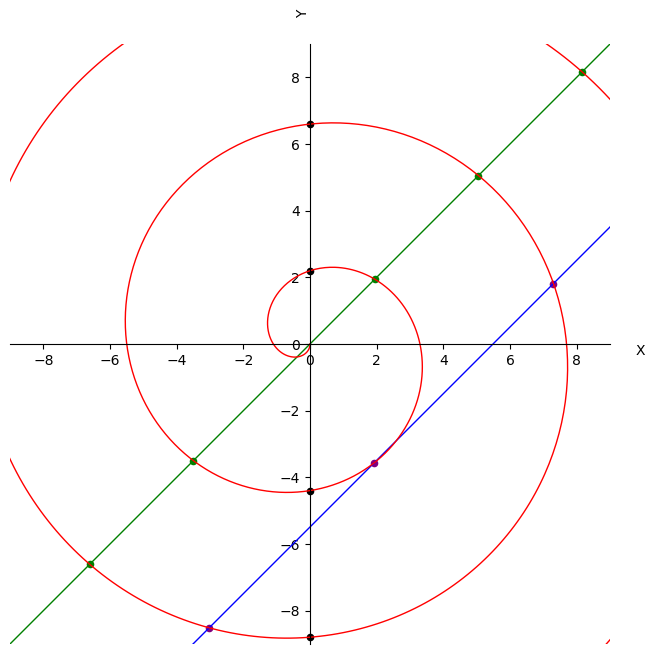

In [6]:
# Define line and spiral variables

factor = 1
a = factor *1
b = factor * -5.49
'factor = 4'
'a = 1'
'b = -5.64'
'13.9752109'
'-5.53005'
spiral_radius_velocity = factor *0.7
init_spiral_angle = 3*(np.pi/2)
spiral_angle_velocity = -1

c = 9
f = 10
plot_objects(a, b,spiral_radius_velocity, spiral_angle_velocity, 
             init_spiral_angle,
             figsize=(f, f),
             x_y_lim=((-c, c),(-c, c)))

In [7]:


def take_derivative(t,init_spiral_angle, spiral_angle_velocity, spiral_radius_velocity):
    total_angle = init_spiral_angle + t* spiral_radius_velocity
    d_x = spiral_angle_velocity * np.cos(total_angle) - t * spiral_radius_velocity * spiral_angle_velocity * np.sin(total_angle)
    d_y = spiral_angle_velocity * np.cos(total_angle) - t * spiral_radius_velocity * spiral_angle_velocity * np.sin(total_angle)

88888888888888
-0.8953559125534681 1.8197050647903972 1.8197050647903972
v/w:  1.0
1.1584602241229975
const_angle:  116.1987329109703
0.4607040277786828


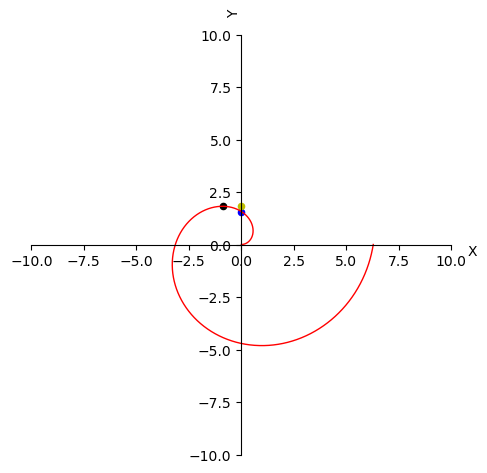

In [8]:
b = 10

create_field(x_lim=(-b,b), y_lim=(-b,b))

v = 1
w = 1

time = np.linspace(0, 2*np.pi, 3000)
x = time*v*np.cos(time * w)
y = time*v*np.sin(time * w)


print('88888888888888')
angles = time*w
y_angles_zip = list(zip(angles, y))
y_angles_zip = np.array([a for a in y_angles_zip if 0<=a[0]<=np.pi])
y_max = max(y_angles_zip[:,1])
# print([a for a in y_angles_zip if 0<=a[0]<=np.pi])
c = np.pi/2/w
pi_by_2_y = c*v*np.sin(c*w)


plt.plot(x, y,  color = 'red', linewidth = 1, linestyle = '-')
max_y = max(y)
max_x = x[list(y).index(max_y)]
print(max_x, max_y, y_max)
# print((1 - init_spiral_angle)/spiral_angle_velocity)
print('v/w: ',v/w)
print(max_y/pi_by_2_y)
const_angle = np.pi/2 +np.arctan(y_max/ max_x)
print('const_angle: ', const_angle*180/np.pi + 90)

plt.scatter(max_x, max_y, color= 'black', s=20)

u_t = (np.pi/2 + const_angle) / w

y_intrsct = u_t* v * np.sin(u_t*w)
x_intrsct = u_t* v * np.cos(u_t*w)

plt.scatter(0, pi_by_2_y, color='blue', s=20)
plt.scatter(0, y_intrsct, color='y',s=20)
# plt.scatter(x_intrsct, y_intrsct, color='r',s=20)

'1.1584541771785286'
'1.158460555101382'
'26.396396396396362'
print((26.396396396396362 * np.pi)/180)
plt.show()

x max:  3.6394114176260364


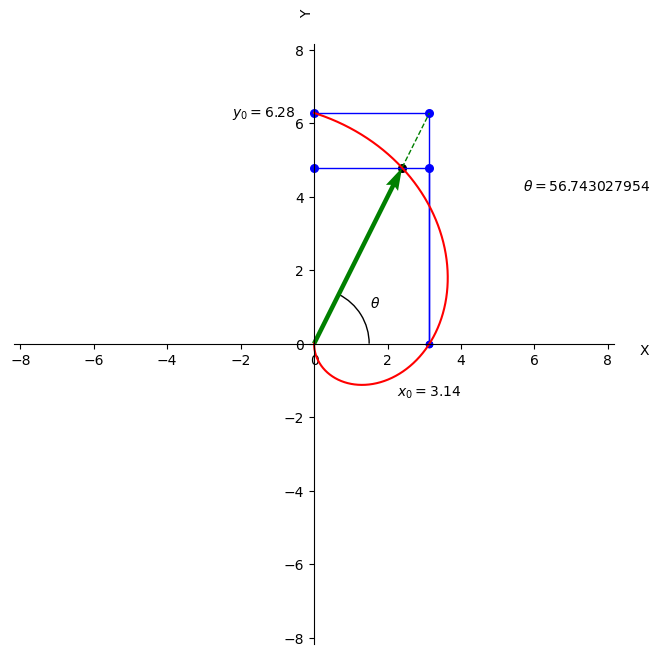

'3.6392487163493437'

In [72]:
t  = np.linspace(0, np.pi, 2000)
v = 2
w =1
init_angle = -np.pi/2
angles = np.linspace(init_angle,init_angle + np.pi, 2000 )
x = t*v*np.cos(angles)
y = t * v * np.sin(angles)

f = 10
y_max = max(y)
x_max = max(x)

y_axis_limit = 1.3*y_max
# x_axis_limit = 1.5*x_max

t_90_degree = np.pi/2/w
x_0 = t_90_degree * v


ax = create_field(figsize=(f, f), x_lim=(-y_axis_limit, y_axis_limit), y_lim=(-y_axis_limit, y_axis_limit))




def draw_all_intersects(x, y, w, init_angle,ax,
                        include_axis_lines=True,
                        draw_rad_vec=True,
                        steps_count=2):
    if steps_count <2:
        raise ValueError('Steps count must be greater than one')
    
    plt.text(x, -1.1, r'$x_0 = {:.2f}$'.format(x), ha='center', va='top', color='black')

    plt.text(-0.5, y, r'$y_0 = {:.2f}$'.format(y), ha='right', va='center', color='black')

    
    for i in range(steps_count):
     
        rad_vec_angle, rad_vec_t = get_rad_vec_params(x, y, w, init_angle)

        if i == 0 and steps_count ==2:
             
            arc = Arc((0, 0), 1.5*2, 1.5*2, angle=0, theta1=0, theta2=rad_vec_angle*180/np.pi, edgecolor='black')
            ax.add_patch(arc)
            
            plt.text(1.8, 1.1, r'$\theta$', ha='right', va='center', color='black')

        x_spiral_intersect = v * rad_vec_t * np.cos(rad_vec_angle)
        y_spiral_intersect = v * rad_vec_t * np.sin(rad_vec_angle)
        
        
            # draw_par_axis_lines(x, y)
            
        

#             # draw_par_axis_lines(x, y_spiral_intersect)
#             # draw_par_axis_lines(x_spiral_intersect, y)

#         # draw_intersects(x, y_spiral_intersect)
        if include_axis_lines:
            draw_intersects(x, y)
            draw_h_line(x, y)
            draw_v_line(x, y)

        # draw_h_line(y,x_spiral_intersect)
        # draw_v_line(x, y)
    
        if i < steps_count-1:
            

            plt.scatter(x_spiral_intersect,y_spiral_intersect,c='black',s=30)

            if draw_rad_vec:
                plt.quiver(0,0,x_spiral_intersect,y_spiral_intersect,angles = "xy", scale_units = "xy", scale = 1, linewidth = 0.01,color='green')
                plt.plot([x_spiral_intersect, x], [y_spiral_intersect, y], color='green', linestyle='dashed', linewidth=1)
                
        y = y_spiral_intersect
    last_angle = rad_vec_angle *180/np.pi
    plt.text(x+6, y_spiral_intersect, r'$\theta = $'f'{last_angle:.9f}'.format(y), ha='right', va='center', color='black')
    
    
draw_all_intersects(x_0, y_max, w, init_angle,ax, steps_count=2)
plt.plot(x, y,color='red')
print('x max: ', x_max)
plt.show()
'3.6392487163493437'